# Compulsory Exercise
### Algorithms

## Problem 1
Figure illustrating the comparisons done by the brute-force pattern matching algorithm for:

`text    = "aaabaadaabaaa"`

`pattern = "aabaaa"`

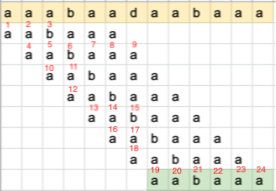


## Problem 2
### a)
Figure illustrating the comparisons between the two strings 

`T = aaabaadaabaaa`

`P = aabaaa`

when using the Boyer-Moore algorithm

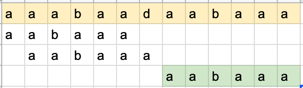


### b)

Average number of comparisons done per text character is approcimately 0.24 for a five character pattern string in the English language. Here I will test the comparisons for different norwegian strings:

In [1]:
import numpy as np

def BMMatch(T, P):
    """
    Pattern matching algorithm using the Boyer-Moore
    technique. T is the text, and P is the pattern.
    The output is the starting index of the first
    substring of T matchin P, or an indication that P
    is not a substring of T.
    """
    
    def last(c):
        """
        Function checking the last instance of a character
        in the pattern string. Returns the index, or if 
        not found: -1.
        """
        for i in range(len(P))[::-1]:
            if c == P[i]:
                return i
        return -1
    
    m = len(P)
    n = len(T)
    count = 0
    
    i = m - 1
    j = m - 1
    
    while (i <= n-1):
        if P[j] == T[i]:
            count += 1
            if j == 0: # First character in the pattern
                return i, count/n # Where in the text
            else: # Reduce once to see if the rest of the pattern match
                i = i-1
                j = j-1
        else:
            i = i + m - min(j, 1+last(T[i])) #jump
            j = m-1
    return "There is no substring of T matching P", count/n

# Define different strings:
TandP = {
    "hei jeg heter anne og studerer dataingeniør": ["anne", "stude", "ingen", "eniør", "heter", "ne og"],
    "se så fint vær vi har i dag jammen meg ingen regn heia": ["fint ", "jamme", "regn ", " heia", "har i", "nt væ"],
    "I matematikk og informatikk er en algoritme en presis beskrivelse av en endelig serie operasjoner som skal utføres for å løse et problem eller flere problemer.": ["matem", "presi", "beskr", "opera", "probl", "serie"],
    "Hvis en prosess er algoritmisk, kan den skrives som en serie operasjoner som kan utføres gjennom beregninger.": ["algor", "opera", "bereg", "ninge", "prose", "tmisk"],
}

# Define the output for the brute force algorithm:
indices                   = []
comparisons_per_character = []

for [t, p] in TandP.items():
    for i in range(len(p)):
        ind, count = BMMatch(t, p[i])
        indices.append(ind)
        comparisons_per_character.append(count)       

Just based on the few examples of norwegian sentences I found that the average comparisons of characters is:

In [2]:
print(sum(comparisons_per_character)/len(comparisons_per_character))

0.08429577468463628


The minimum and maximum number of comparisons per character was:

In [3]:
print("Minimum: ", min(comparisons_per_character))
print("Maximum: ", max(comparisons_per_character))

Minimum:  0.031446540880503145
Maximum:  0.2222222222222222


## Problem 3

Figure illustrating the comparisons done in a Knuth-Morris-Pratt algorithm for the strings:

`T = aaabaadaabaaa`

`P = aabaaa`

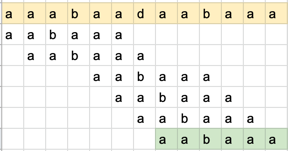

## Problem 4
`P = "aaabbaaa"`

There are three (3) nonempty prefixes of P which are also suffixes of P:
1. `a`
2. `aa`
3. `aaa`

## Problem 5

Draw a standard trie for:

`{abab, baba, cccc, bbaaaa, caa, bbaacc, cbcc, cbca}`

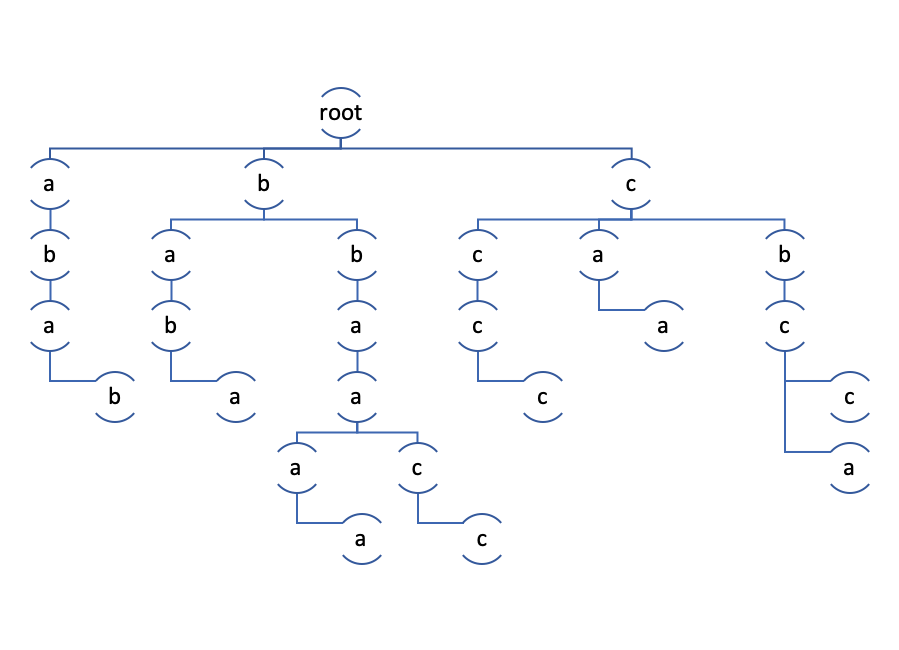

## Problem 6

Draw a compressed trie for:

`{abab, baba, cccc, bbaaaa, caa, bbaacc, cbcc, cbca}`

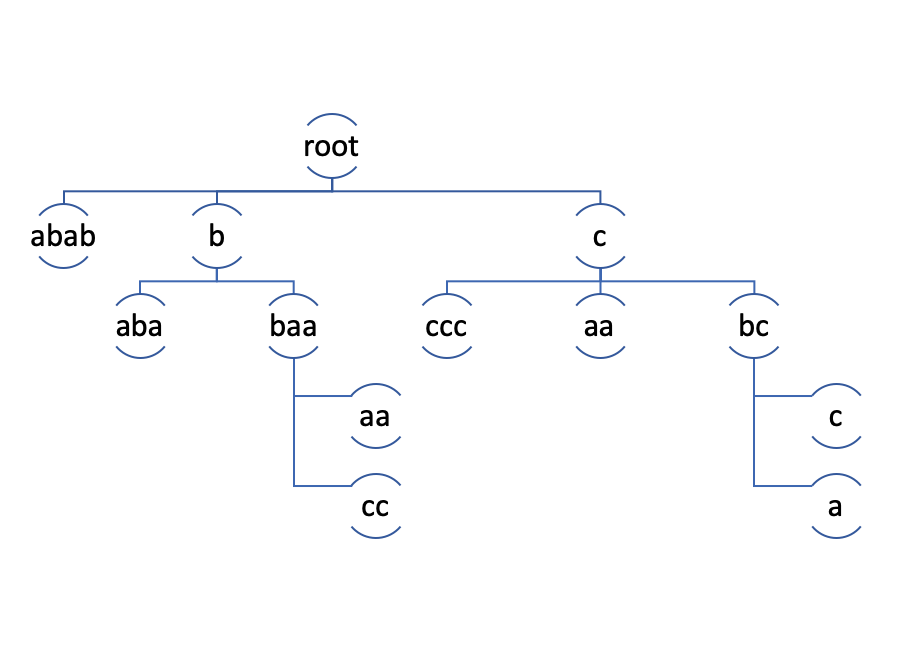

## Problem 7

String: `"dogs do not spot hot pots or cats"`

Frequency table:

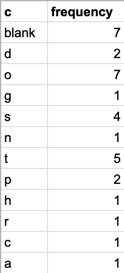

Huffman tree:

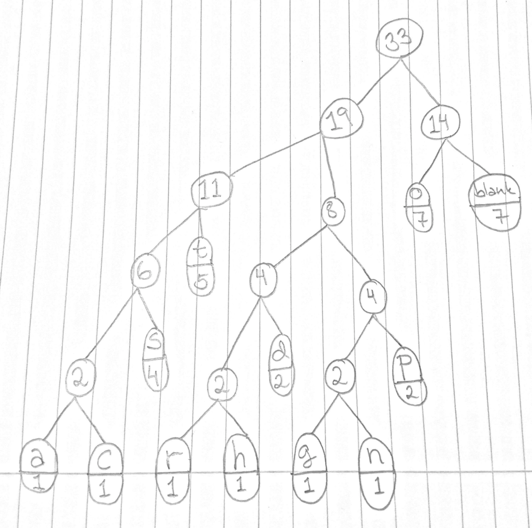

## Problem 8
*Show how to use dynamic programming to compute the number of characters in the longest common subsequence between the two strings:*

`X = "babbabab"`
`Y = "bbabbaaab"`

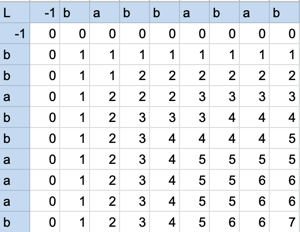

## Problem 9

### a) 

Solving the longest common subsequence problem using a recursive function:

In [64]:
X = "babbabab"
Y = "bbabbaaab"
m = 0
n = 0

def recursiveLCS(X, Y, m, n):
    
    # Need to define the end of the problem, 
    # when we want to stop:
    # Want to stop when we have gone through all the 
    # characters:
    if (m == len(X) or n == len(Y)):
        return 0
    
    # Start by checking if the characters are the same in
    # the current positions m and n:
    if (X[m] == Y[n]):
        # Increase the count by one
        # Since the function is recursive we also need to 
        # check the case for one index up:
        return 1 + recursiveLCS(X, Y, m+1, n+1)
    else:
        # If the characters are not the same we need to check
        # one index over in both cases
        return max(recursiveLCS(X, Y, m+1, n),
                   recursiveLCS(X, Y, m, n+1))
    
    

print(recursiveLCS(X, Y, m, n))


7


### b) 

Solving the longest common subsequence problem using a dynamic function:

In [65]:
import numpy as np
X = "babbabab"
Y = "bbabbaaab"

def dynamicLCS(X, Y):
    m = len(X)
    n = len(Y)
    L = np.zeros((m + 1, n + 1))
    for i in range(m+1):
        for j in range(n+1):
            if (i == 0 or j == 0):
                L[i, j] = 0
            elif (X[i-1] == Y[j-1]):
                L[i, j] = 1 + L[i-1, j-1]
            else:
                L[i, j] =  max(L[i-1, j], L[i, j-1])
                
    #print(L)
    return L[-1, -1]

dynamicLCS(X,Y)

7.0

### c) 

In this part I started with two strings:
* `This course is in machine learning and algorithms`
* `This is a compulsory assignment in algorithms`

First I wrote just the first word and further added one character at the time to find when the recursive algorithm started spending a lot more time than the dynamic version.

In [66]:
import time
X = "This course is in "
Y = "This is a compulso"

print("Length of text1: ", len(X))
print("Length of text2: ", len(Y))

time_rec = time.time()
print(recursiveLCS(X, Y, 0, 0))
time_rec = time.time() - time_rec

time_dyn = time.time()
print(dynamicLCS(X,Y))
time_dyn = time.time() - time_dyn

print("Recursive: ", time_rec)
print("Dynamic:   ", time_dyn)

Length of text1:  18
Length of text2:  18
9
9.0
Recursive:  4.539402008056641
Dynamic:    0.00040221214294433594


At just 14 characters the dynamic version runs 100 times faster than the recursive version. However they are both quicker than 1 second and so it is not very noticable. 

At 17 characters, the recursive version uses more than a second to solve the lcs problem, and at 18 characters the recursive method uses 4.6 seconds, while the dynamic version uses just 0.0004 seconds.